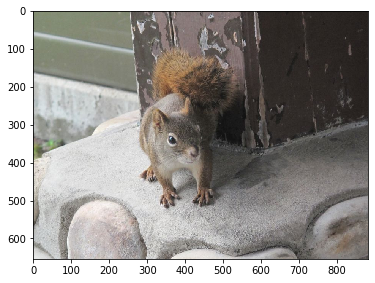

In [1]:
%load_ext autotime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io, color
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage.future import graph
from skimage.util import img_as_float
import seaborn as sns
import cv2 as cv

%matplotlib inline
imgs = [cv.cvtColor(cv.imread("im053.jpg"), cv.COLOR_BGR2RGB) , cv.cvtColor(cv.imread("im054.jpg"), cv.COLOR_BGR2RGB)]
img = imgs[0]
img_lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
plt.figure(figsize=(6,6))
plt.imshow(img)


In [2]:
points = [[350, 350], [400, 600]]

def do_merge(img_ready, segments, thresh):
    def _weight_mean_color(graph, src, dst, n):
        diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
        diff = np.linalg.norm(diff)
        return {'weight': diff}

    def merge_mean_color(graph, src, dst):
        graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
        graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
        graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])
    g = graph.rag_mean_color(img_ready, segments)
    return graph.merge_hierarchical(segments, g, thresh=thresh, rag_copy=False, in_place_merge=True, merge_func=merge_mean_color, weight_func=_weight_mean_color)

# segments_fz = felzenszwalb(img, scale=1000, sigma=0.5, min_size=10)
# segments = slic(img, n_segments=2000, compactness=10, sigma=1, convert2lab=True)
# segments = quickshift(img, kernel_size=3, max_dist=10, ratio=0.5)
# gradient = sobel(rgb2gray(img_rgb))
# segments = watershed(gradient, markers=1000, compactness=0.001)

# print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
# print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
# print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

# fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# ax[0, 0].imshow(mark_boundaries(img, segments_fz))
# ax[0, 0].set_title("Felzenszwalbs's method")
# ax[0, 1].imshow(mark_boundaries(img, segments_slic))
# ax[0, 1].set_title('SLIC')
# ax[1, 0].imshow(mark_boundaries(img, segments_quick))
# ax[1, 0].set_title('Quickshift')
# ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
# ax[1, 1].set_title('Compact watershed')

# for a in ax.ravel():
#     a.set_axis_off()



time: 7.47 ms


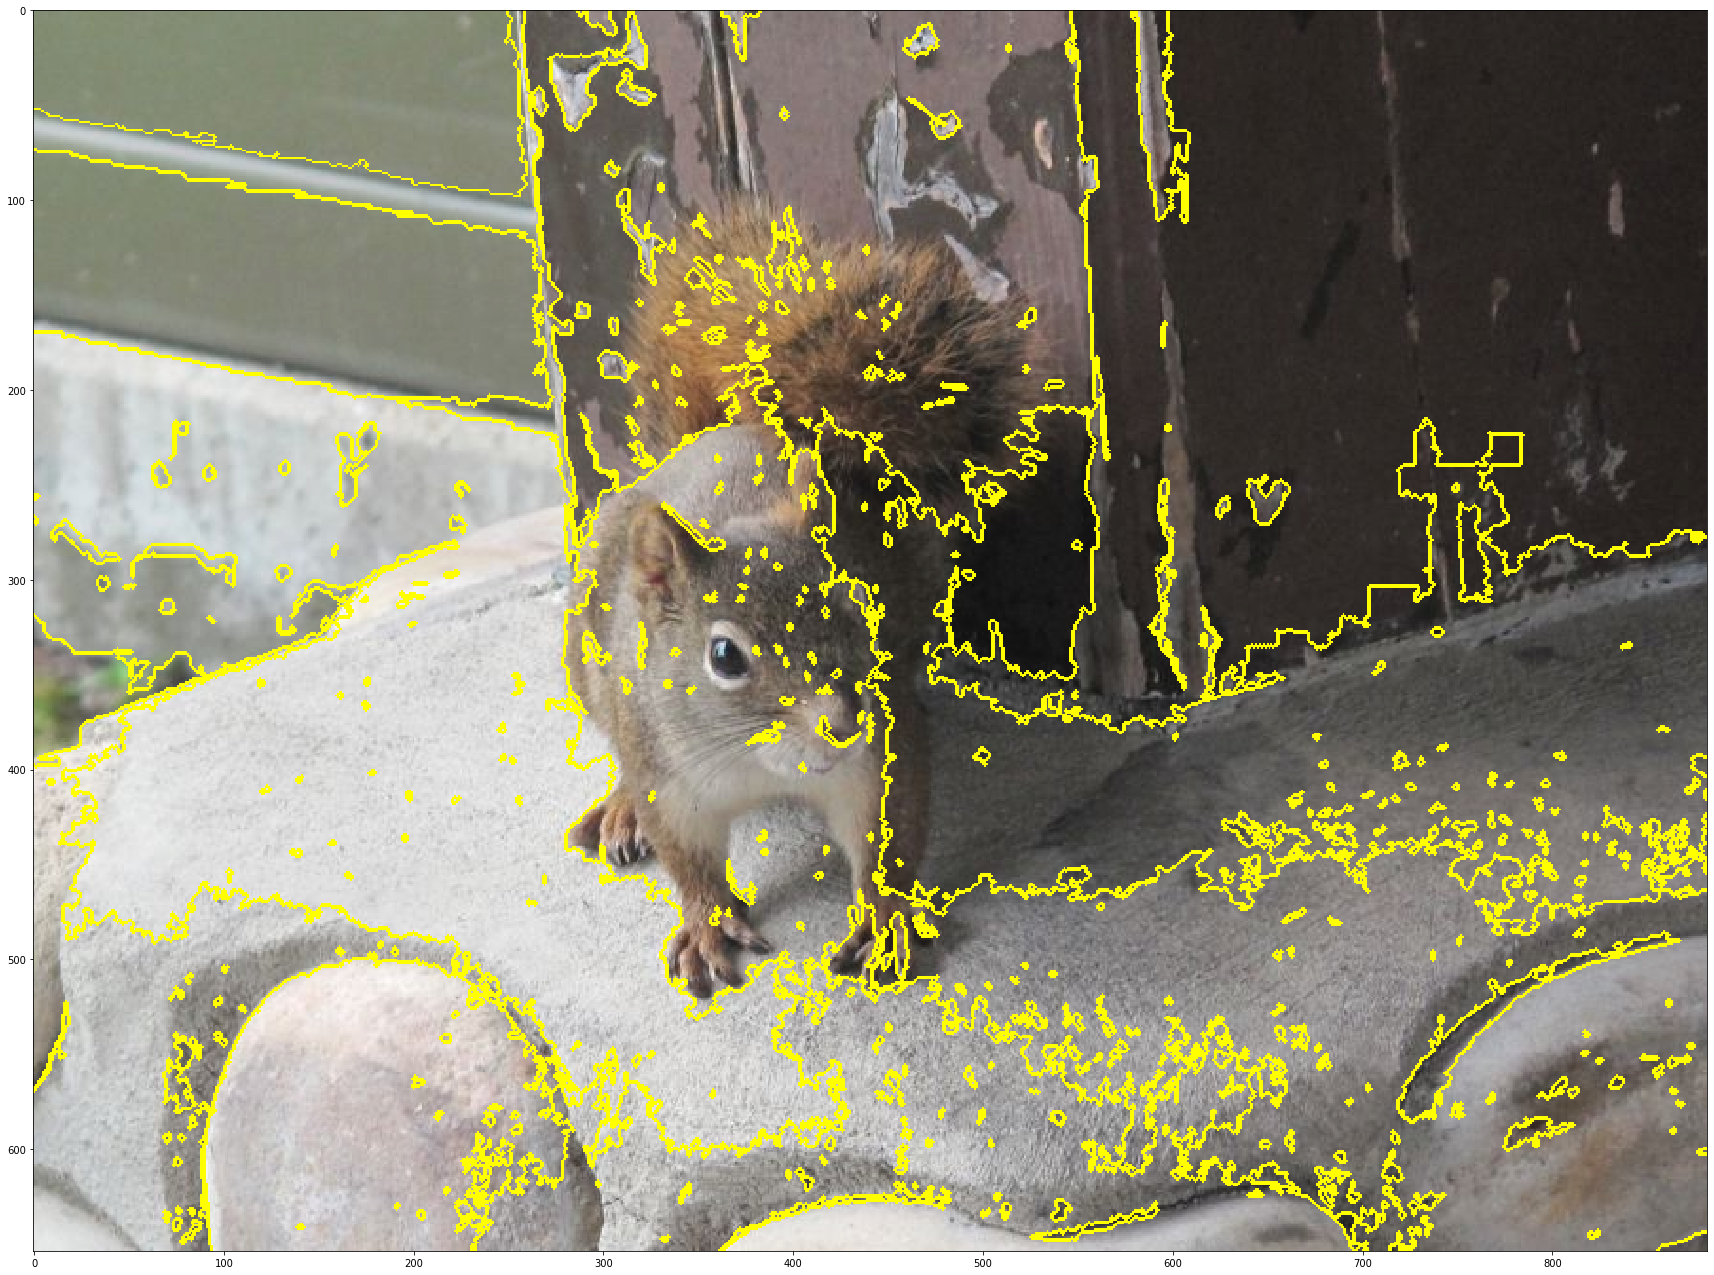

time: 20.5 s


In [3]:
# plt.figure(figsize=(10, 10))
# plt.imshow(mark_boundaries(img, segments_quick))
# plt.figure(figsize=(10, 10))
# plt.figure(figsize=(30,30))
# plt.imshow(mark_boundaries(img, segments))
# plt.show()
segments = felzenszwalb(img, scale=5000, sigma=0.01, min_size=5)
plt.figure(figsize=(30,30))
segments = do_merge(img, segments, 30)
plt.imshow(mark_boundaries(img, segments))
plt.show()

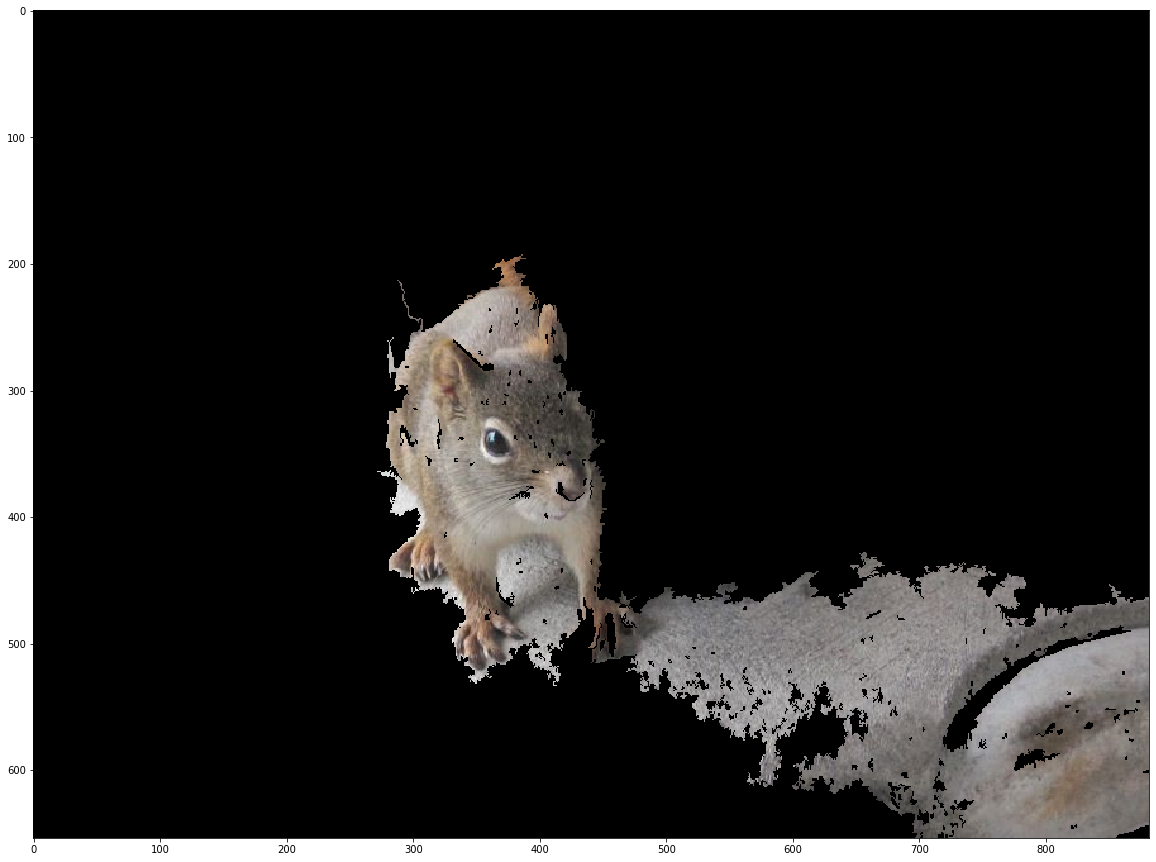

time: 1.16 s


In [4]:
img_tmp = np.zeros(img.shape[:2])
x,y = points[0]
label = segments[x, y]
img_tmp[segments == label] = 1

one = img_tmp == 1
img_tmp = np.zeros(img.shape, dtype=np.uint64)
img_tmp[one] = img[one]
plt.figure(figsize=(20, 20))
plt.imshow(img_tmp)
plt.imsave("im06.jpg", np.array(img_tmp, dtype=np.uint8))
plt.show()

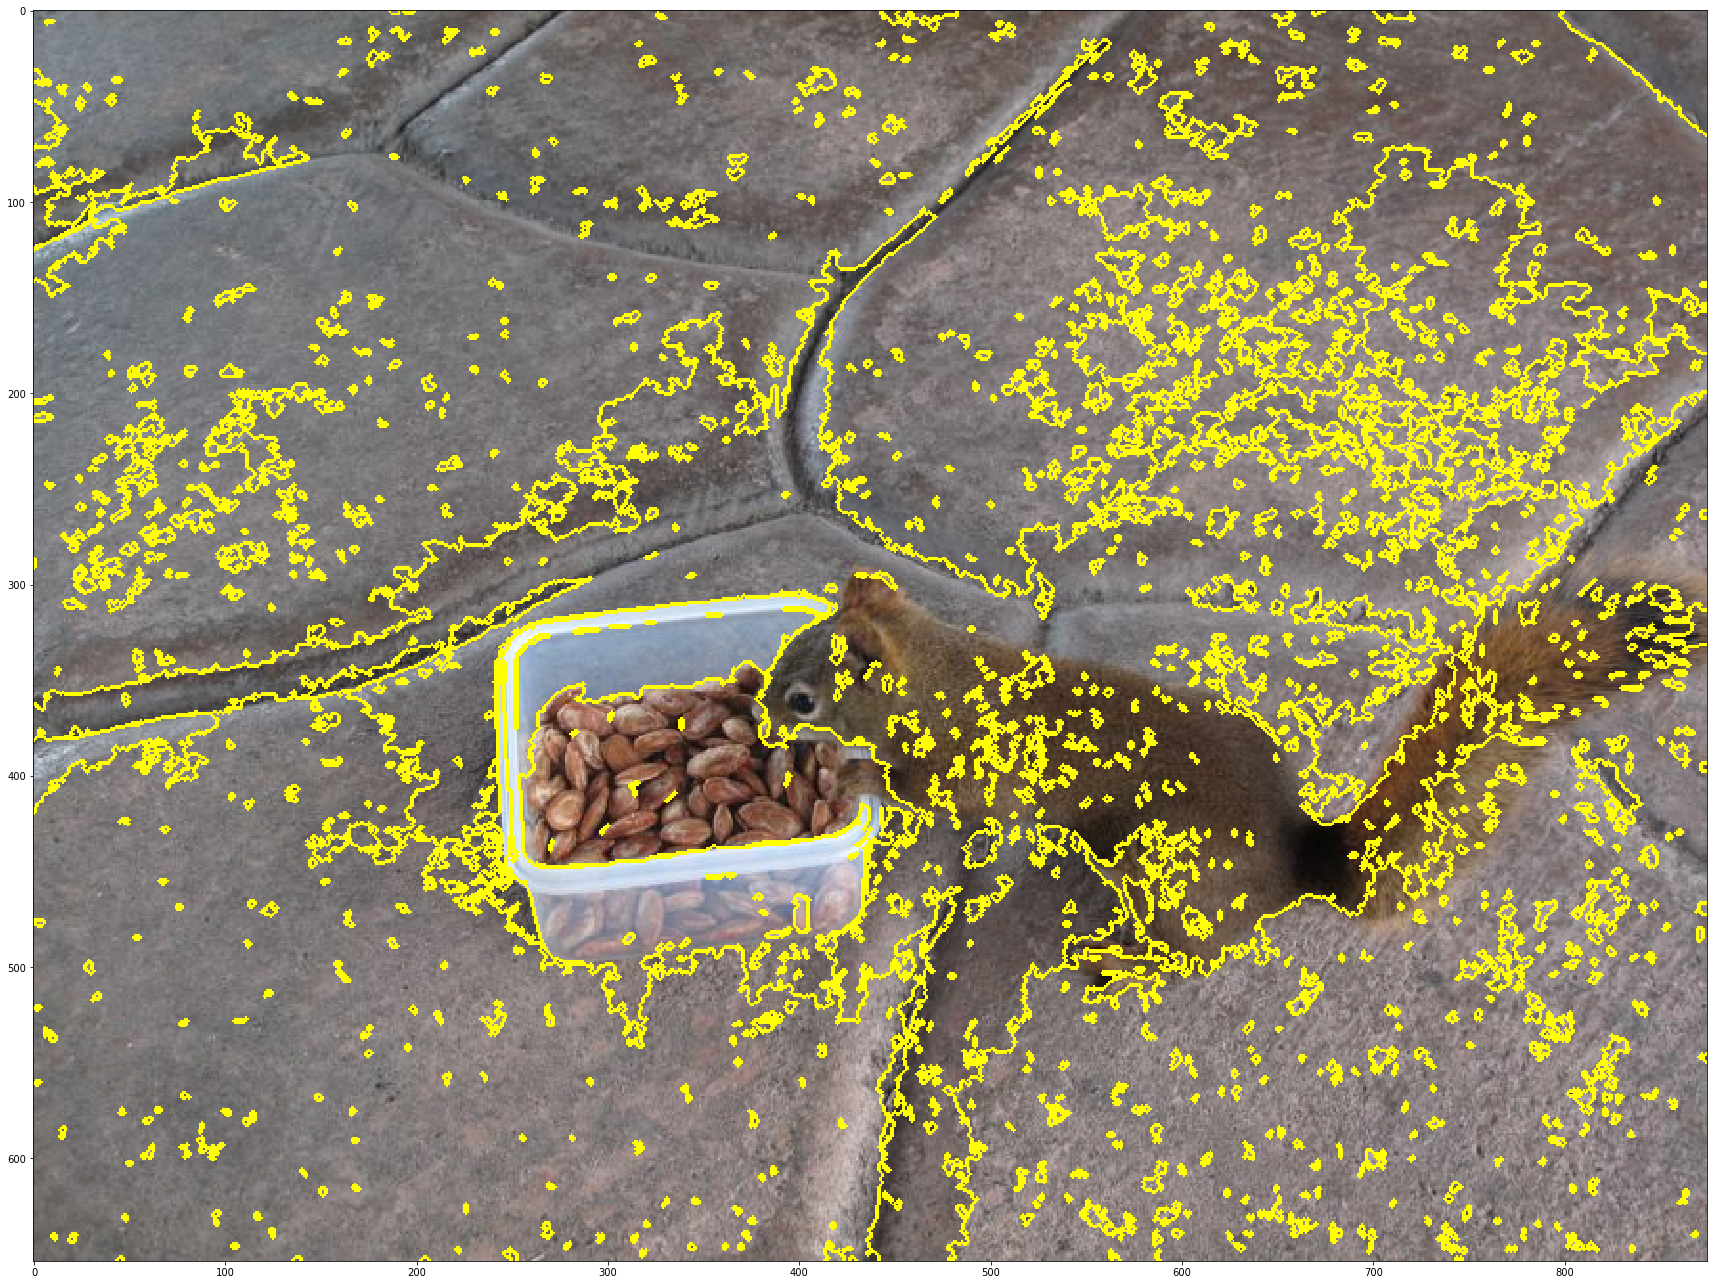

time: 26.5 s


In [11]:
img = imgs[1]
segments = felzenszwalb(img, scale=3000, sigma=0.015, min_size=5)
plt.figure(figsize=(30,30))
segments = do_merge(img, segments, 20)
plt.imshow(mark_boundaries(img, segments))
plt.show()

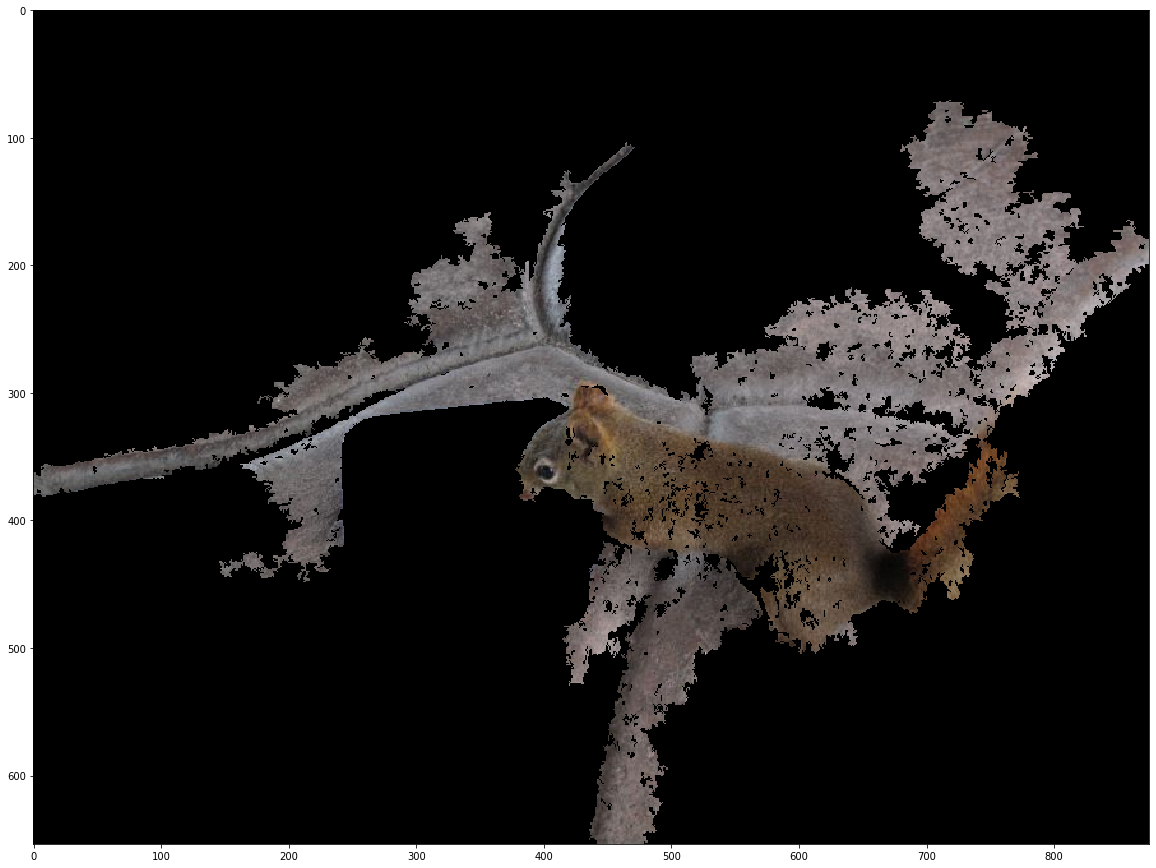

time: 984 ms


In [12]:
img_tmp = np.zeros(img.shape[:2])
x,y = points[1]
label = segments[x, y]
img_tmp[segments == label] = 1

one = img_tmp == 1
img_tmp = np.zeros(img.shape, dtype=np.uint64)
img_tmp[one] = img[one]
plt.figure(figsize=(20, 20))
plt.imshow(img_tmp)
plt.imsave("im07.jpg", np.array(img_tmp, dtype=np.uint8))
plt.show()

<div dir="rtl">
طبق روش گفته شده در تمرین، از SLIC استفاده کردیم و با آزمون و خطا و البته تعریف هر پارامتری ورودی این تابع، بهینه ترین مقادیر را برای بدست آمدن نتیجه بهتر، انتخاب کردیم
</div>